# Deep Learning LeNet V5

### LeNet V5 : Is a deep learning simple neural network used for Computer Vision Applications manily.

In [26]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import models, layers
from keras.datasets import mnist
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import joblib

import cv2

In [27]:
activation_func = 'tanh'
dim = (32, 32)

### Load Data

In [28]:
# Load Data from pkl file
x, y, classes = joblib.load('imges_labels_classes.pkl')

In [29]:
print(len(x), len(y), classes)

25000 25000 ['deco_type_naskh', 'advirtising_bold', 'andalus', 'diwani_letter', 'municode_sara']


In [30]:
for i in range(len(x)):
    x[i]=cv2.resize(x[i], dim, interpolation=cv2.INTER_AREA)

In [31]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 5000]
 [   1 5000]
 [   2 5000]
 [   3 5000]
 [   4 5000]]


In [32]:
# Split the data into 80% Traning and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [33]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 3979]
 [   1 4000]
 [   2 4015]
 [   3 4011]
 [   4 3995]]


### Setup Data

In [36]:
x_test = np.array(x_test, dtype='float32')
x_train = np.array(x_train, dtype='float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

In [37]:
# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, len(classes))
y_test = np_utils.to_categorical(y_test, len(classes))

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

### Model Structure

In [40]:
# Instantiate an empty model
model = Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), 
                        activation='tanh', input_shape=(32, 32, 1), padding="same"))
# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1), padding='valid'))
# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5),
                        strides=(1, 1), activation='tanh', padding='valid'))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2), padding='valid'))
# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))
# Output Layer with softmax activation
model.add(layers.Dense(len(classes), activation='softmax'))
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

### Traning

In [41]:
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.1)

Train on 18000 samples, validate on 2000 samples
Epoch 1/10
 - 37s - loss: 1.1966 - accuracy: 0.5357 - val_loss: 1.1341 - val_accuracy: 0.5025
Epoch 2/10
 - 37s - loss: 0.7823 - accuracy: 0.7142 - val_loss: 0.7042 - val_accuracy: 0.7140
Epoch 3/10
 - 38s - loss: 0.5806 - accuracy: 0.7927 - val_loss: 0.5702 - val_accuracy: 0.7675
Epoch 4/10
 - 37s - loss: 0.4710 - accuracy: 0.8344 - val_loss: 0.4046 - val_accuracy: 0.8580
Epoch 5/10
 - 37s - loss: 0.3916 - accuracy: 0.8640 - val_loss: 0.4310 - val_accuracy: 0.8315
Epoch 6/10
 - 37s - loss: 0.3325 - accuracy: 0.8854 - val_loss: 0.3266 - val_accuracy: 0.8840
Epoch 7/10
 - 37s - loss: 0.2912 - accuracy: 0.9017 - val_loss: 0.2728 - val_accuracy: 0.9120
Epoch 8/10
 - 37s - loss: 0.2537 - accuracy: 0.9141 - val_loss: 0.2369 - val_accuracy: 0.9185
Epoch 9/10
 - 37s - loss: 0.2268 - accuracy: 0.9241 - val_loss: 0.2993 - val_accuracy: 0.8815
Epoch 10/10
 - 37s - loss: 0.2016 - accuracy: 0.9346 - val_loss: 0.2180 - val_accuracy: 0.9215


In [ ]:
#model.save('without_aug_80_epoch.h5')

### Testing

In [42]:
test_score = model.evaluate(x_test, y_test)
print(test_score)

5000/5000 [==============================] - 5s 1ms/step


Text(0, 0.5, 'acc')

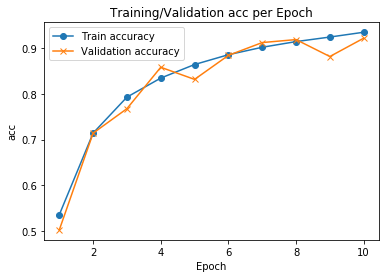

In [45]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train accuracy', 'Validation accuracy'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')


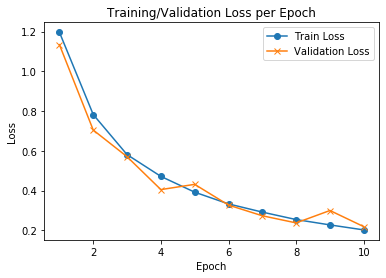

In [46]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()